<h2 style="color : #004080;"><span style="text-decoration : underline">Exercice 1 :</span>Analyse des données de fabrication de ciment</h2>

In [30]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
sns.set_theme(style="darkgrid")

<h2> 1. Prétraitement des données </h2>

In [2]:
df = pd.read_excel('./data/exercice_1/data_Ciment.xlsx', sheet_name=0)
df.isnull().sum()

A     71
B      2
C      2
D      7
E     13
F      2
G      2
H      2
I      2
J     30
K      2
L      2
M      1
N      2
O      2
P      2
Q      2
R     74
S      2
T      2
U      2
V     74
W      2
X     74
Y      2
Z      2
AA     2
AB     2
AV     2
AD     2
AE     2
AF     2
AG     2
AH     2
AI     2
AJ     2
AK     2
AL     2
AM     2
AN     2
AO     2
AP     2
AQ     2
AR     2
dtype: int64

### Renommer les colonnes

In [3]:
# df1 = pd.read_excel('./data/exercice_1/data_Ciment.xlsx', sheet_name=1, usecols=[0, 1], nrows=44, header=None)
# columns = {}
# for col in df1.to_dict(orient='records'):
#     columns[col[0]] = col[1]
# df.rename(columns=columns, inplace=True)
# df.head()

### Identification des colonnes nulles

<Axes: >

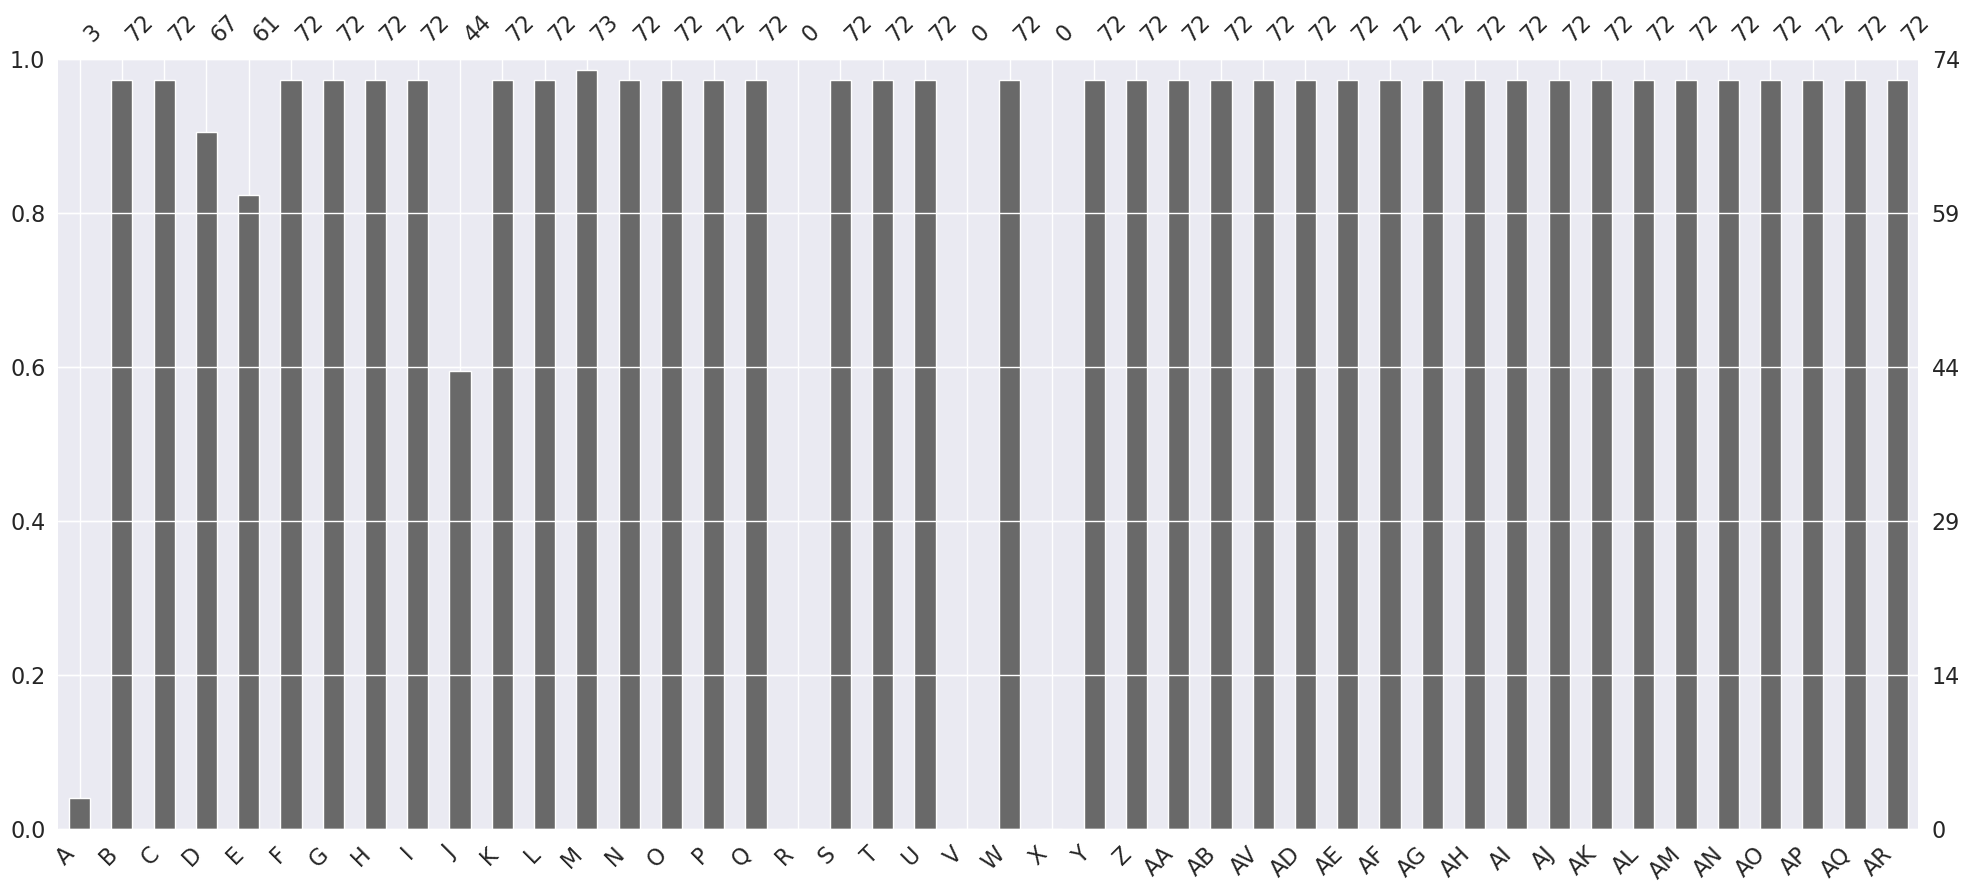

In [22]:
msno.bar(df)

### Identification et suppression des colonnes constantes et null

In [4]:
for col in df.columns:
    nb_value = df[col].nunique()
    if nb_value <= 1:
        df.drop(axis=0, columns=[col], inplace=True)
        print(f"Colonne \"{col}\" supprimée")

Colonne "R" supprimée
Colonne "V" supprimée
Colonne "X" supprimée
Colonne "AH" supprimée
Colonne "AI" supprimée
Colonne "AQ" supprimée


In [5]:
#Pourcentage de donnees manquantes
col_missing_pct = (df.isna().sum()/df.shape[0])*100
col_missing_pct.sort_values(ascending=False)

A     95.945946
J     40.540541
E     17.567568
D      9.459459
C      2.702703
B      2.702703
F      2.702703
G      2.702703
H      2.702703
I      2.702703
K      2.702703
L      2.702703
N      2.702703
O      2.702703
T      2.702703
P      2.702703
Q      2.702703
S      2.702703
W      2.702703
U      2.702703
Y      2.702703
Z      2.702703
AJ     2.702703
AA     2.702703
AB     2.702703
AV     2.702703
AD     2.702703
AE     2.702703
AF     2.702703
AG     2.702703
AN     2.702703
AK     2.702703
AL     2.702703
AM     2.702703
AP     2.702703
AO     2.702703
AR     2.702703
M      1.351351
dtype: float64

### Identification et suppression des colonnes inutile

In [6]:
# Suppression de la colonne Date
df.drop(df.columns[0], axis=1, inplace=True)

### Vérifier l'asymétrie des données numériques dans le jeu de données

In [7]:
num_col = df.dtypes[df.dtypes != 'object'].index

# Calculate the number of rows needed for the subplots
num_features = len(num_col)
rows = (num_features + 1) // 2  # Two columns per row

In [ ]:
# Create the figure
fig = plt.figure(figsize=(16, rows * 5))

# Affichage de l'asymétrie des données
for i, feature in enumerate(df[num_col]):
    ax = fig.add_subplot(rows, 2, i+1)
    ax.hist(df[feature], bins = 25, color = '#00A0A0')
    ax.set_title("Distribution de '%s'"%(feature), fontsize = 14)
    ax.set_xlabel("Valeur")
    ax.set_ylabel("Nombre d'entrées")
    ax.set_ylim((0, df.shape[0]))
    ax.set_yticks([b for b in range(0, df.shape[0], max(1, df.shape[0] // 4))])
    # ax.set_yticklabels([b for b in range(0, df.shape[0], df.shape[0]/4)])

# Tracé aesthetics
fig.suptitle("Distributions des caractéristiques de données continues du recensemment", fontsize = 16, y = 1.03)

fig.tight_layout()
plt.show()

In [8]:
# Calcul de l'asymétrie et ordonancer
skew_feats = df[num_col].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness = skewness.to_dict()['Skew']
skewness

{'Z': 8.48130506125031,
 'AD': 6.760095569147783,
 'AN': 5.8700564462546545,
 'AJ': 2.1335971792744446,
 'D': 1.6760158416742108,
 'AB': 1.4729031589072221,
 'O': 0.9158139185533496,
 'AE': 0.8621897328185427,
 'AO': 0.8434771266157399,
 'J': 0.5875196235750714,
 'S': 0.5428392405919509,
 'AF': 0.4337477462610552,
 'G': 0.34024955508559435,
 'Y': 0.32866621312759003,
 'I': 0.2695836396718121,
 'T': 0.17522068537947713,
 'K': 0.1421176198954849,
 'AA': 0.11101554752854365,
 'M': 0.028520575679802575,
 'AV': -0.030334279265101217,
 'Q': -0.11587196542633213,
 'N': -0.20838603042094683,
 'U': -0.22662766230761888,
 'AM': -0.3518910898832249,
 'P': -0.38927093847328903,
 'AK': -0.4747677506894832,
 'W': -0.6369987231131244,
 'H': -0.7075046938758908,
 'C': -1.007320937418922,
 'AL': -1.2731724853822075,
 'L': -1.3635654592700697,
 'AP': -1.3649079679351783,
 'F': -3.963628153504723,
 'AR': -8.32729516952413,
 'AG': -8.48528137423856}

In [ ]:
df.describe()

In [ ]:
df.head()

### Transformer les colonnes "Eligibility test" et "hour"

In [9]:
df[df.columns[3]] = df[df.columns[3]].apply(lambda x: 1 if (x=="Y") else 0)

In [ ]:
df.head()

In [10]:
df.dropna(subset=[df.columns[0]], inplace=True)

df[df.columns[0]]=df[df.columns[0]].apply(lambda x: str(x).split(':')[0])

df['hour_sin'] = np.sin(2 * np.pi * df[df.columns[0]].astype(int) / 24)
df['hour_cos'] = np.cos(2 * np.pi * df[df.columns[0]].astype(int) / 24)

df.head()

,B,C,D,E,F,G,H,I,J,K,...,AJ,AK,AL,AM,AN,AO,AP,AR,hour_sin,hour_cos
0,00,410.0,0.44,1,3.9,14.5,20.5,374.0,381.0,4.8,...,9.5,52.0,16.0,61.0,20.0,71.0,0.4,339.0,0.000000,1.000000
1,01,410.0,11.28,0,3.9,14.5,20.5,371.0,382.0,4.8,...,9.5,51.0,16.0,61.0,20.0,70.0,0.4,341.0,0.258819,0.965926
2,02,410.0,0.65,1,3.9,14.0,20.5,368.0,387.0,4.8,...,9.5,51.0,16.0,62.0,20.0,72.0,0.4,343.0,0.500000,0.866025
3,03,410.0,0.69,1,3.9,14.0,20.5,371.0,385.0,4.9,...,9.5,53.0,16.0,63.0,20.0,70.0,0.4,341.0,0.707107,0.707107
4,04,410.0,0.65,1,3.9,14.0,20.5,371.0,398.0,4.9,...,9.5,53.0,16.0,60.0,20.0,70.0,0.4,338.0,0.866025,0.500000


### Identifier les colonnes aux valeurs manquantes

In [11]:
# Les colonnes cibles sont ceux ayant des valeurs manquantes
df.isna().sum()

B            0
C            0
D            5
E            0
F            0
G            0
H            0
I            0
J           28
K            0
L            0
M            0
N            0
O            0
P            0
Q            0
S            0
T            0
U            0
W            0
Y            0
Z            0
AA           0
AB           0
AV           0
AD           0
AE           0
AF           0
AG           0
AJ           0
AK           0
AL           0
AM           0
AN           0
AO           0
AP           0
AR           0
hour_sin     0
hour_cos     0
dtype: int64

In [12]:
df_cp = df.copy(deep=True)

In [13]:
df.columns[2], df.columns[8]

('D', 'J')

### Remplacer les valeurs manquantes

In [14]:
df[df.columns[2]] = df[df.columns[2]].fillna(np.median(df[df.columns[2]]))
df[df.columns[8]] = df[df.columns[8]].fillna(np.mean(df[df.columns[8]]))

In [51]:
df.head()

,B,C,D,E,F,G,H,I,J,K,...,AJ,AK,AL,AM,AN,AO,AP,AR,hour_sin,hour_cos
0,00,410.0,0.44,1,3.9,14.5,20.5,374.0,381.0,4.8,...,9.5,52.0,16.0,61.0,20.0,71.0,0.4,339.0,0.000000,1.000000
1,01,410.0,11.28,0,3.9,14.5,20.5,371.0,382.0,4.8,...,9.5,51.0,16.0,61.0,20.0,70.0,0.4,341.0,0.258819,0.965926
2,02,410.0,0.65,1,3.9,14.0,20.5,368.0,387.0,4.8,...,9.5,51.0,16.0,62.0,20.0,72.0,0.4,343.0,0.500000,0.866025
3,03,410.0,0.69,1,3.9,14.0,20.5,371.0,385.0,4.9,...,9.5,53.0,16.0,63.0,20.0,70.0,0.4,341.0,0.707107,0.707107
4,04,410.0,0.65,1,3.9,14.0,20.5,371.0,398.0,4.9,...,9.5,53.0,16.0,60.0,20.0,70.0,0.4,338.0,0.866025,0.500000


### Verifier la correlation entre les differentes colonnes

<Axes: >

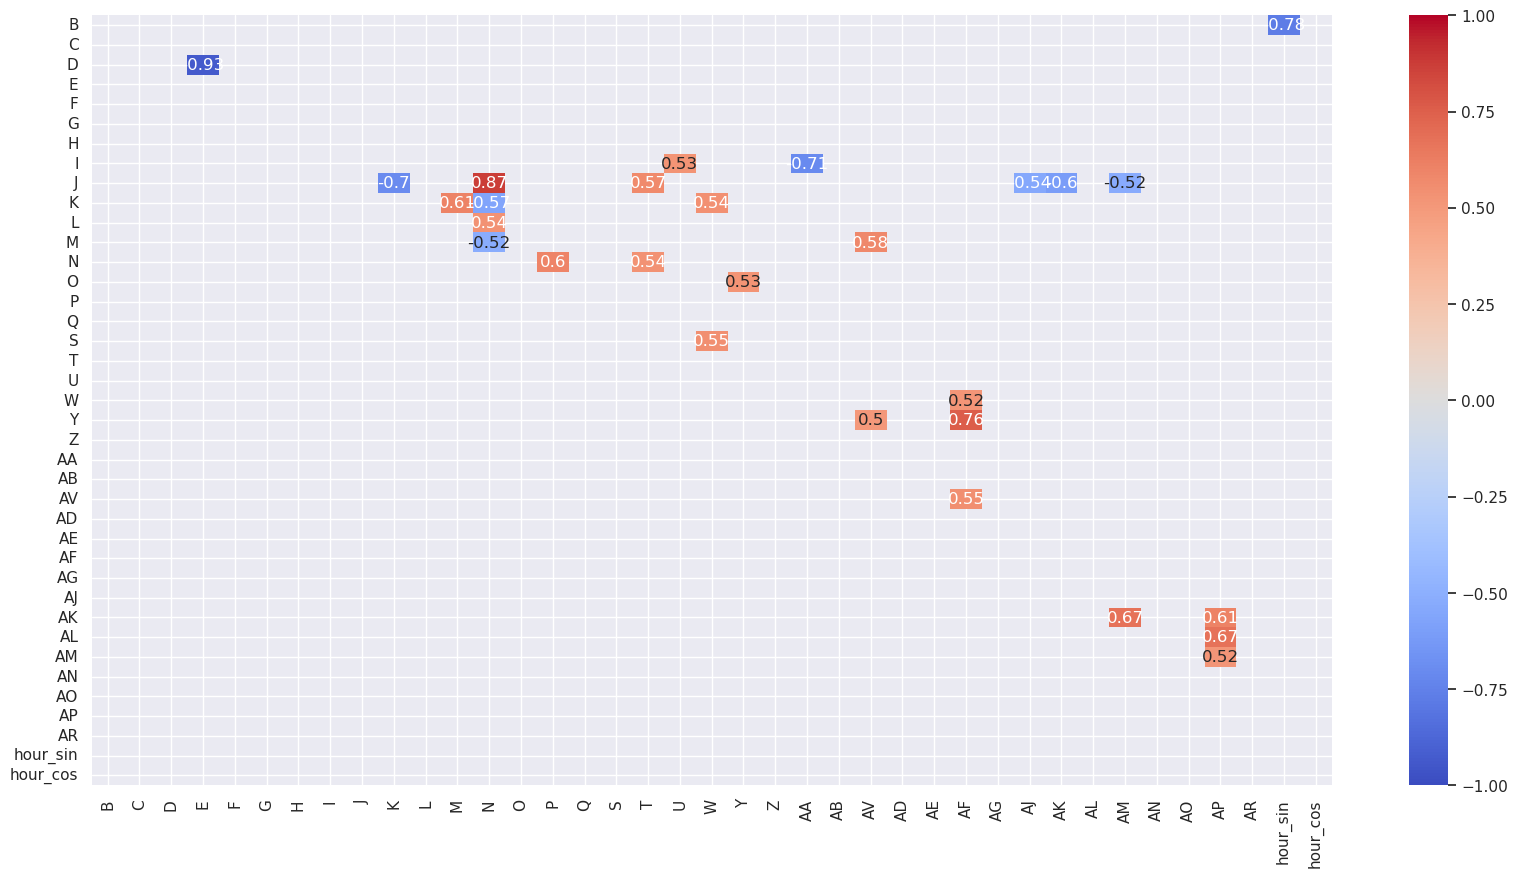

In [15]:
# Calculate correlation matrix
corr = df_cp.corr()

# Filter correlations greater than 0.5 in absolute value
filtered_corr = corr.where((corr.abs() > 0.5) & (corr.abs() < 1))

# Create a mask to hide NaNs and the lower triangle
mask = filtered_corr.isnull() | (np.tril(np.ones(filtered_corr.shape)).astype(bool))

figure = plt.figure(figsize=(20, 10))
sns.heatmap(filtered_corr, mask=mask, annot=True, cmap='coolwarm',
            vmin=-1.0, vmax=1.0,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Suppression des colonnes corrélées

In [79]:
# Suppression des colonnes corrélées suivant les valeurs de la matrice de correlation


### Séparation des données d'entrainement, de validation, de test et ceux à prédire

In [16]:
pred_df = df_cp[df_cp[df.columns[2]].isna() | df_cp[df.columns[8]].isna()]
pred_df

,B,C,D,E,F,G,H,I,J,K,...,AJ,AK,AL,AM,AN,AO,AP,AR,hour_sin,hour_cos
9,09,410.0,11.21,0,3.9,14.0,19.0,389.0,NaN,4.8,...,9.5,54.0,16.0,64.0,20.0,74.0,0.4,344.0,7.071068e-01,-7.071068e-01
10,10,410.0,0.73,1,3.9,13.5,19.0,389.0,NaN,4.7,...,10.0,55.0,18.0,65.0,23.0,72.0,0.5,334.0,5.000000e-01,-8.660254e-01
11,11,410.0,0.81,1,3.9,13.0,19.0,385.0,NaN,4.7,...,15.0,53.0,20.0,63.0,23.0,71.0,0.5,341.0,2.588190e-01,-9.659258e-01
12,12,410.0,0.24,1,3.9,13.0,19.0,385.0,NaN,4.8,...,10.0,52.0,18.0,64.0,20.0,73.0,0.5,340.0,1.224647e-16,-1.000000e+00
13,13,410.0,11.27,0,3.9,13.5,20.0,380.0,NaN,4.8,...,10.0,54.0,18.0,62.0,20.0,74.0,0.5,344.0,-2.588190e-01,-9.659258e-01
14,14,410.0,0.48,1,3.9,13.5,20.0,377.0,NaN,4.9,...,10.0,55.0,18.0,64.0,20.0,73.0,0.5,345.0,-5.000000e-01,-8.660254e-01
15,15,410.0,0.74,1,3.9,13.5,19.0,377.0,NaN,4.8,...,10.0,56.0,18.0,63.0,20.0,73.0,0.5,345.0,-7.071068e-01,-7.071068e-01
16,16,410.0,0.50,1,3.8,13.5,19.5,371.0,NaN,4.7,...,9.0,54.0,18.0,64.0,20.0,74.0,0.5,344.0,-8.660254e-01,-5.000000e-01
17,17,410.0,11.21,0,3.8,14.5,19.5,368.0,NaN,4.8,...,9.0,55.0,18.0,62.0,20.0,72.0,0.5,341.0,-9.659258e-01,-2.588190e-01
18,18,410.0,2.42,0,3.9,15.0,20.0,368.0,NaN,4.8,...,9.0,53.0,18.0,63.0,20.0,73.0,0.5,340.0,-1.000000e+00,-1.836970e-16


### Gestion de l'asymétrie, par une transformation logarithmique des colonnes à utiliser avec nos modèles.

In [17]:
# Take columns with high correlation with target values
high_corr_columns = {}

for target_column in ['J', 'D']:
    high_corr_columns[target_column] = new_high_corr_columns = corr.loc[
        (corr[target_column].abs() > 0.5) & (corr[target_column].abs() < 1),
        target_column
    ].index.tolist()

high_corr_columns

{'J': ['K', 'N', 'T', 'AJ', 'AK', 'AM'], 'D': ['E']}

In [18]:
df_cp = df_cp[df_cp[df.columns[2]].notna() & df_cp[df.columns[8]].notna()]
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(df_cp.drop(columns=[df.columns[2]]), df_cp[df.columns[8]], test_size=0.4, random_state=42)

In [19]:
for t_col in ['J', 'D']:
    # Log transformation des caractéristiques fortement asymétriques
    for col in high_corr_columns.get(t_col):
        if col in skewness.keys():
            if skewness[col] > 1:
                X_train_df[col].apply(lambda x: np.log(x + 1))
                X_test_df[col].apply(lambda x: np.log(x + 1))

In [20]:
scaler = MinMaxScaler() # default=(0, 1)

In [21]:
#Normalisation des colonnes present dans num_col
X_num_cols = []
for col in X_train_df.columns:
    if col in num_col:
        X_num_cols.append(col)
X_num_cols

['C',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'S',
 'T',
 'U',
 'W',
 'Y',
 'Z',
 'AA',
 'AB',
 'AV',
 'AD',
 'AE',
 'AF',
 'AG',
 'AJ',
 'AK',
 'AL',
 'AM',
 'AN',
 'AO',
 'AP',
 'AR']

In [22]:
scaler = MinMaxScaler() # default=(0, 1)
X_train_df[X_num_cols] = scaler.fit_transform(X_train_df[X_num_cols])
X_train_df.head()

,B,C,E,F,G,H,I,J,K,L,...,AJ,AK,AL,AM,AN,AO,AP,AR,hour_sin,hour_cos
62,14,1.000000,1,1.0,0.50,0.666667,0.15625,0.081081,0.75,0.526316,...,1.000000,1.00,1.0,1.0,0.0,0.25,1.0,0.981073,-0.500000,-0.866025
61,13,1.000000,0,1.0,0.50,0.666667,0.18750,0.108108,0.75,0.543860,...,1.000000,1.00,1.0,1.0,0.0,0.25,1.0,0.952681,-0.258819,-0.965926
0,00,0.666667,1,1.0,0.75,1.000000,0.43750,0.378378,0.25,0.719298,...,0.500000,0.25,0.0,0.0,0.0,0.25,0.0,0.962145,0.000000,1.000000
50,02,0.666667,1,1.0,0.00,0.333333,0.03125,0.324324,0.50,0.666667,...,0.666667,0.25,1.0,0.5,0.0,1.00,1.0,0.958991,0.500000,0.866025
5,05,0.666667,0,1.0,0.50,1.000000,0.43750,0.675676,0.50,0.000000,...,0.500000,0.00,0.0,0.5,0.0,0.25,0.0,0.981073,0.965926,0.258819


In [25]:
X_test_df[X_num_cols] = scaler.transform(X_test_df[X_num_cols])
X_test_df.head()

,B,C,E,F,G,H,I,J,K,L,...,AJ,AK,AL,AM,AN,AO,AP,AR,hour_sin,hour_cos
51,03,0.666667,1,1.0,0.25,0.666667,0.03125,0.432432,0.50,0.649123,...,0.666667,0.25,1.0,0.75,0.0,0.50,1.0,0.968454,0.707107,0.707107
24,00,0.333333,1,1.0,1.00,0.666667,0.37500,0.108108,0.75,0.578947,...,0.500000,1.00,1.0,1.00,0.0,0.25,1.0,0.977918,0.000000,1.000000
8,08,0.666667,1,1.0,0.50,0.333333,0.78125,0.540541,0.25,0.964912,...,0.500000,0.00,0.0,0.00,0.0,0.25,0.0,0.971609,0.866025,-0.500000
52,04,0.666667,1,1.0,0.25,0.666667,0.03125,0.297297,0.25,0.631579,...,0.666667,0.75,1.0,0.50,0.0,0.75,1.0,0.958991,0.866025,0.500000
4,04,0.666667,1,1.0,0.50,1.000000,0.34375,0.837838,0.50,-0.035088,...,0.500000,0.50,0.0,-0.25,0.0,0.00,0.0,0.958991,0.866025,0.500000


In [26]:
X_train_J_df = X_train_df[high_corr_columns.get('J')]
X_test_J_df = X_test_df[high_corr_columns.get('J')]

In [29]:
X_train_D_df = X_train_df[high_corr_columns.get('D')]
X_test_D_df = X_test_df[high_corr_columns.get('D')]

### Modèles pour la prédiction des elements manquants de la colonne D

In [33]:
d_reg_lin_model = LinearRegression()
d_reg_lin_model.fit(X_train_D_df, y_train_df)
y_pred_reg_lin = d_reg_lin_model.predict(X_test_D_df)
r2_score_d_pred_reg_lin = r2_score(y_test_df, y_pred_reg_lin)
mse_d_pred_reg_lin = mean_squared_error(y_test_df, y_pred_reg_lin)

print(f"Error: mse = {mse_d_pred_reg_lin:.4f}, r2_score = {r2_score_d_pred_reg_lin:.4f}")

Error: mse = 113.6363, r2_score = -0.0070
